## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/countries-of-the-world-2023/world-data-2023.csv


## Import Data

In [2]:
df = pd.read_csv(r"/kaggle/input/countries-of-the-world-2023/world-data-2023.csv")
pd.set_option('display.max_columns', None)
#df.set_index('Country', inplace=True)
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [3]:
df['GDP'] = df['GDP'].astype(str).str.replace("$", "").str.replace(",", "")
df['Land Area(Km2)'] = df['Land Area(Km2)'].astype(str).str.replace(",", "")
df["Armed Forces size"] = df['Armed Forces size'].astype(str).str.replace(",", "")
df["Co2-Emissions"] = df['Co2-Emissions'].astype(str).str.replace(",", "")
df["Minimum wage in $"] = df['Minimum wage'].astype(str).str.replace("$", "")
df["Gasoline Price in $"] = df['Minimum wage'].astype(str).str.replace("$", "")
df["Population"] = df['Population'].astype(str).str.replace(",", "")
df["Urban_population"] = df['Urban_population'].astype(str).str.replace(",", "")
df["Agricultural Land( %)"] = df['Agricultural Land( %)'].astype(str).str.replace("%", "")
df["CPI Change (%)"] = df['CPI Change (%)'].astype(str).str.replace("%", "")
df["Forested Area (%)"] = df['Forested Area (%)'].astype(str).str.replace("%", "")
df["Gross primary education enrollment (%)"] = df['Gross primary education enrollment (%)'].astype(str).str.replace("%", "")
df["Gross tertiary education enrollment (%)"] = df['Gross tertiary education enrollment (%)'].astype(str).str.replace("%", "")
df["Out of pocket health expenditure"] = df['Out of pocket health expenditure'].astype(str).str.replace("%", "")
df["Population: Labor force participation (%)"] = df['Population: Labor force participation (%)'].astype(str).str.replace("%", "")
df["Tax revenue (%)"] = df['Tax revenue (%)'].astype(str).str.replace("%", "")
df["Total tax rate"] = df['Total tax rate'].astype(str).str.replace("%", "")
df["Unemployment rate"] = df['Unemployment rate'].astype(str).str.replace("%", "")
df["Gasoline Price"] = df['Gasoline Price'].astype(str).str.replace("$", "")
df["Minimum wage"] = df['Minimum wage'].astype(str).str.replace("$", "")
df["Density\n(P/Km2)"] = df["Density\n(P/Km2)"].astype(str).str.replace(",", "")

/tmp/ipykernel_32/900360561.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GDP'] = df['GDP'].astype(str).str.replace("$", "").str.replace(",", "")
/tmp/ipykernel_32/900360561.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Minimum wage in $"] = df['Minimum wage'].astype(str).str.replace("$", "")
/tmp/ipykernel_32/900360561.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Gasoline Price in $"] = df['Minimum wage'].astype(str).str.replace("$", "")
/tmp/ipykernel_32/900360561.py:19: FutureWarning: Th

In [4]:
df['GDP'] = df['GDP'].astype(float)
df['Land Area(Km2)'] = df['Land Area(Km2)'].astype(float)
df["Armed Forces size"] = df['Armed Forces size'].astype(float)
df["Co2-Emissions"] = df['Co2-Emissions'].astype(float)
df["Minimum wage in $"] = df['Minimum wage'].astype(float)
df["Gasoline Price in $"] = df['Minimum wage'].astype(float)
df["Population"] = df['Population'].astype(float)
df["Urban_population"] = df['Urban_population'].astype(float)
df["Agricultural Land( %)"] = df['Agricultural Land( %)'].astype(float)
df["CPI Change (%)"] = df['CPI Change (%)'].astype(float)
df["Forested Area (%)"] = df['Forested Area (%)'].astype(float)
df["Gross primary education enrollment (%)"] = df['Gross primary education enrollment (%)'].astype(float)
df["Gross tertiary education enrollment (%)"] = df['Gross tertiary education enrollment (%)'].astype(float)
df["Out of pocket health expenditure"] = df['Out of pocket health expenditure'].astype(float)
df["Population: Labor force participation (%)"] = df['Population: Labor force participation (%)'].astype(float)
df["Tax revenue (%)"] = df['Tax revenue (%)'].astype(float)
df["Total tax rate"] = df['Total tax rate'].astype(float)
df["Unemployment rate"] = df['Unemployment rate'].astype(float)
df["Gasoline Price"] = df['Gasoline Price'].astype(float)
df["Density\n(P/Km2)"] = df['Density\n(P/Km2)'].astype(float)

In [19]:
sorted_df = df.sort_values(by='Population', ascending=False)

In [29]:
df2 = sorted_df.head(10)

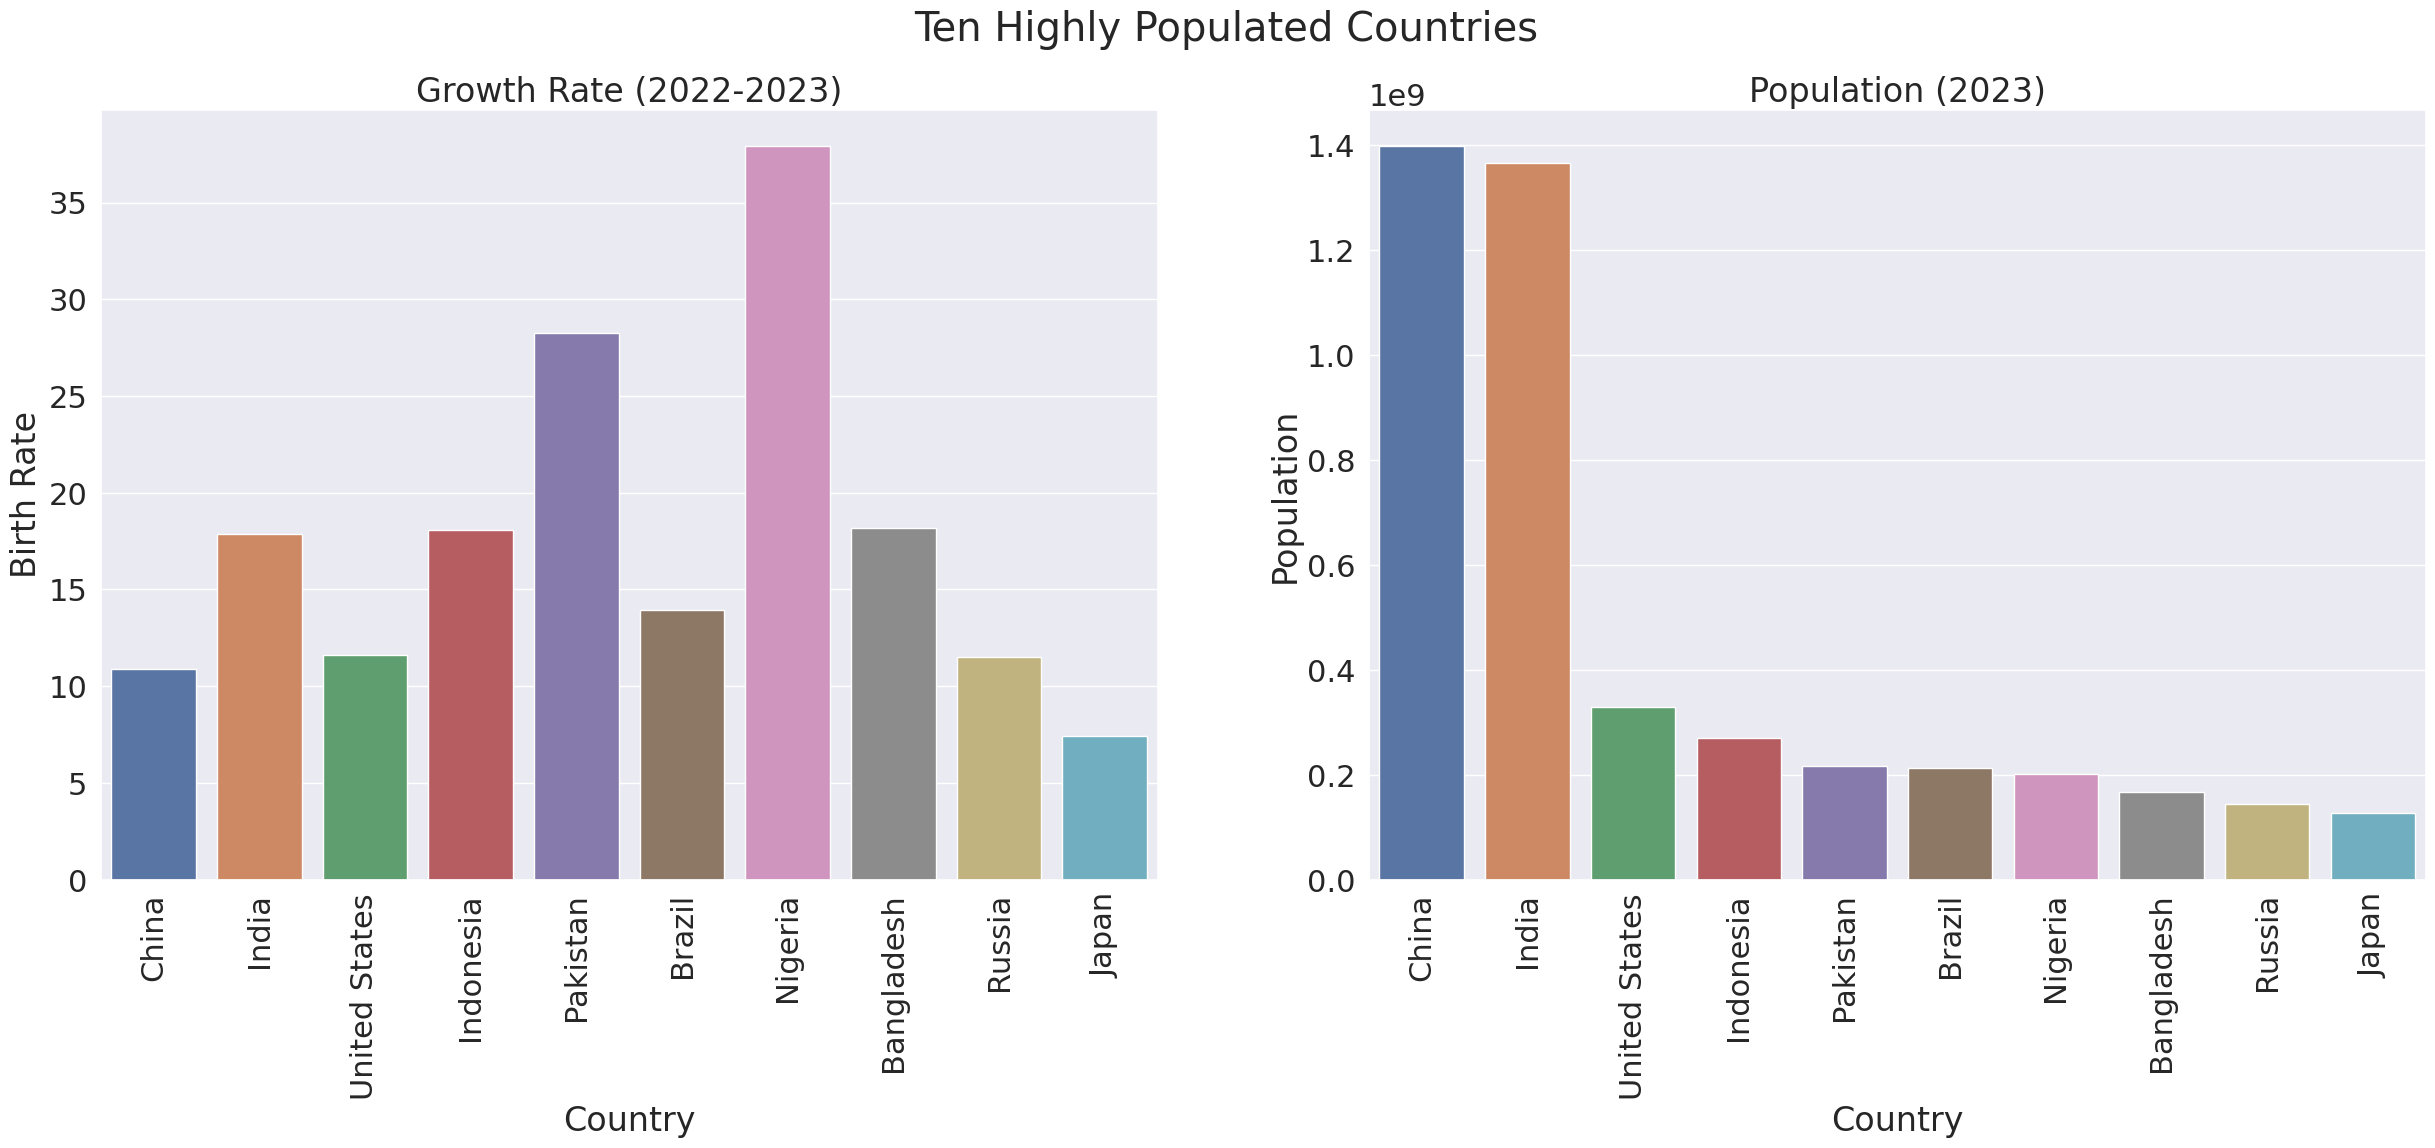

In [30]:
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2, figsize= (30,10))
sns.barplot(x = 'Country', y = 'Birth Rate', data=df2, ax=ax[0])
sns.barplot(x = 'Country', y = 'Population', data=df2, ax=ax[1])
ax[0].set_title ("Growth Rate (2022-2023)")
ax[1].set_title("Population (2023)")


ax[0].set_xticklabels(labels = df2["Country"],rotation=90)
ax[1].set_xticklabels(labels = df2["Country"],rotation=90)

plt.suptitle ("Ten Highly Populated Countries")
plt.show()

In [32]:
bir = df[df['Birth Rate'] > 0].sort_values('Birth Rate', ignore_index=True, ascending=False)
bir

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Minimum wage in $,Gasoline Price in $
0,Niger,19.0,NE,36.1,1267000.0,10000.0,46.08,227.0,Niamey,2017.0,109.32,-2.5,XOF,6.91,0.9,0.88,1.292815e+10,74.7,4.4,48.0,Niamey,62.0,509.0,0.29,French,52.3,0.04,23310715.0,72.0,11.8,47.2,0.47,3850231.0,17.607789,8.081666,0.29,0.29
1,Chad,13.0,TD,39.7,1284000.0,35000.0,42.17,235.0,N'Djamena,1016.0,117.7,-1.0,XAF,5.75,3.8,0.78,1.131495e+10,86.8,3.3,71.4,N'Djamena,54.0,1140.0,0.60,French,56.4,0.04,15946876.0,70.7,NaN,63.5,1.89,3712273.0,15.454166,18.732207,0.60,0.60
2,Somalia,25.0,SO,70.3,637657.0,20000.0,41.75,252.0,Mogadishu,645.0,NaN,NaN,SOS,6.07,10.0,1.41,4.720727e+09,23.4,2.5,76.6,Bosaso,57.1,829.0,nan,Arabic,NaN,0.02,15442905.0,47.4,0.0,NaN,11.35,7034861.0,5.152149,46.199616,NaN,NaN
3,Mali,17.0,ML,33.8,1240192.0,18000.0,41.54,223.0,Bamako,3179.0,108.73,-1.7,XOF,5.88,3.8,1.12,1.751014e+10,75.6,4.5,62.0,Bamako,58.9,562.0,0.23,French,46.3,0.13,19658031.0,70.8,11.6,54.5,7.22,8479688.0,17.570692,-3.996166,0.23,0.23
4,Democratic Republic of the Congo,40.0,CD,11.6,2344858.0,134000.0,41.18,243.0,Kinshasa,2021.0,133.85,2.9,CDF,5.92,67.2,1.49,4.731962e+10,108.0,6.6,68.2,Kinshasa,60.4,473.0,0.18,French,37.4,0.07,86790567.0,63.5,10.7,50.7,4.24,39095679.0,-4.038333,21.758664,0.18,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Italy,206.0,IT,43.2,301340.0,347000.0,7.30,39.0,Rome,320411.0,110.62,0.6,EUR,1.29,31.8,1.61,2.001244e+12,101.9,61.9,2.6,Rome,82.9,2.0,nan,Italian,22.8,3.98,60297396.0,49.6,24.3,59.1,9.89,42651966.0,41.871940,12.567380,NaN,NaN
185,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,6.63,6.63
186,San Marino,566.0,SM,16.7,61.0,NaN,6.80,378.0,City of San Marino,NaN,110.63,1.0,EUR,1.26,0.0,NaN,1.637931e+09,108.1,42.5,1.7,City of San Marino,85.4,NaN,nan,Italian,18.3,6.11,33860.0,NaN,18.1,36.2,NaN,32969.0,43.942360,12.457777,NaN,NaN
187,South Korea,527.0,KR,17.4,99720.0,634000.0,6.40,82.0,Seoul,620302.0,115.16,0.4,KRW,0.98,63.4,1.22,2.029000e+12,98.1,94.3,2.7,Seoul,82.6,11.0,6.49,Korean,36.8,2.36,51709098.0,63.0,15.6,33.2,4.15,42106719.0,35.907757,127.766922,6.49,6.49


[]

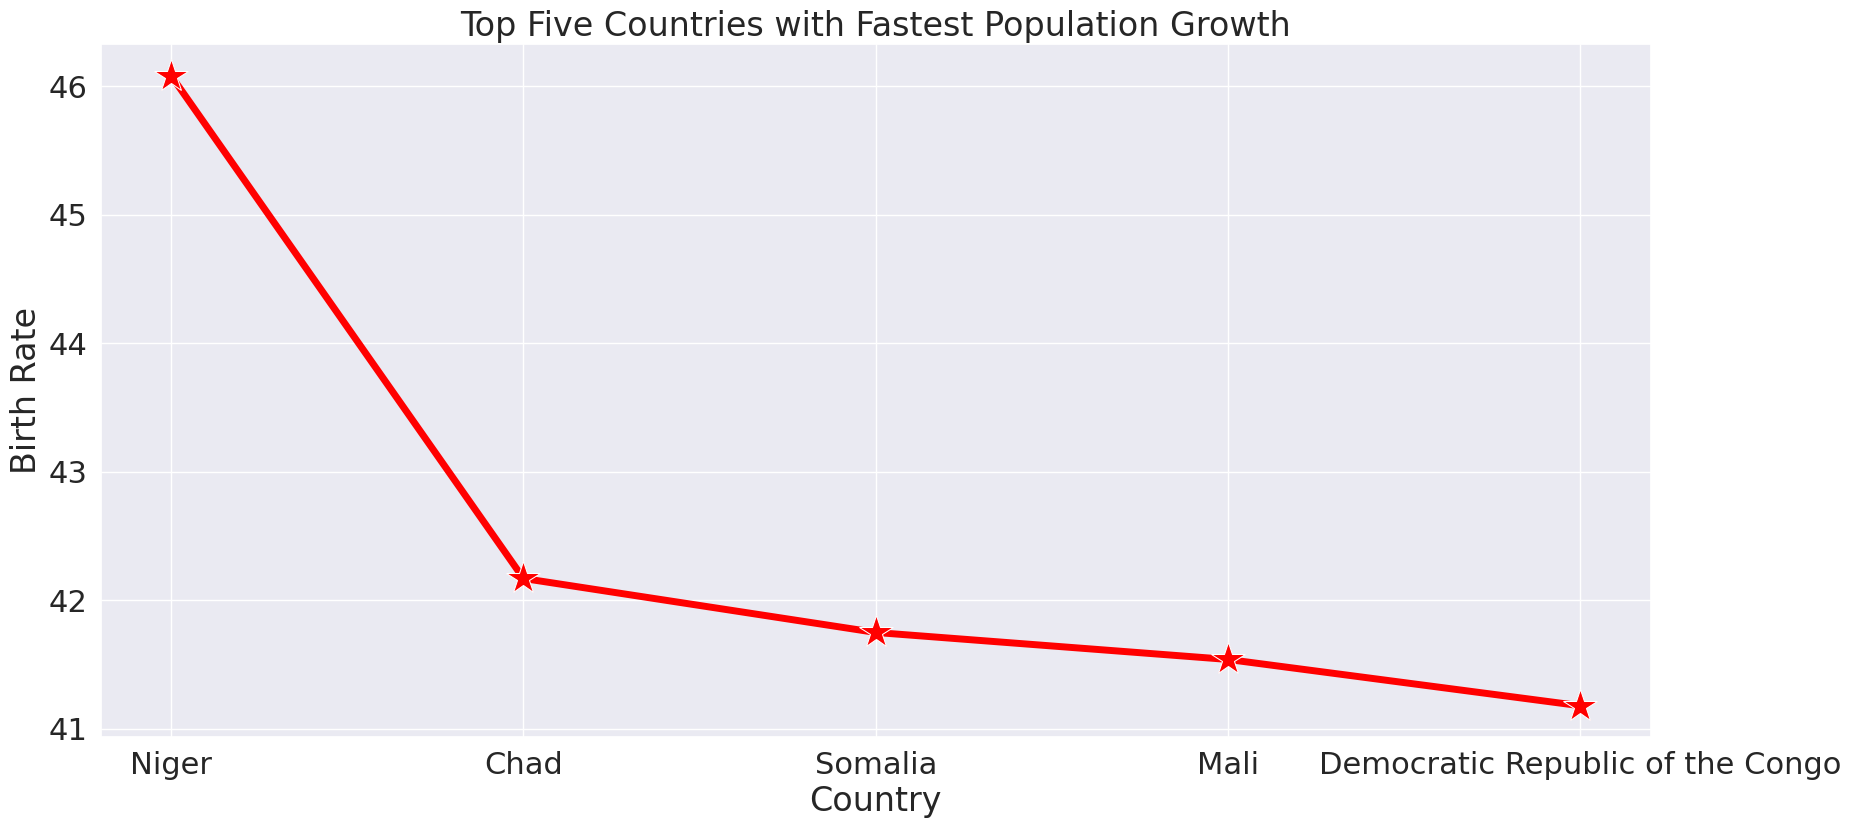

In [36]:
plt.figure(figsize = (20,9))
sns.lineplot(data = bir.head(), x='Country', y='Birth Rate', marker='*', color='red', markersize=25, linewidth=5)
plt.title("Top Five Countries with Fastest Population Growth")
plt.plot()

In [6]:
top_10_countries1 = df.nlargest(10, 'Co2-Emissions')
top_10_countries1

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Minimum wage in $,Gasoline Price in $
36,China,153.0,CN,56.2,9596960.0,2695000.0,10.90,86.0,Beijing,9893038.0,125.08,2.9,CNY,1.69,22.4,0.96,1.991000e+13,100.2,50.6,7.4,Shanghai,77.0,29.0,0.87,Standard Chinese,32.4,1.98,1.397715e+09,68.0,9.4,59.2,4.32,842933962.0,35.861660,104.195397,0.87,0.87
186,United States,36.0,US,44.4,9833517.0,1359000.0,11.60,1.0,"Washington, D.C.",5006302.0,117.24,7.5,USD,1.73,33.9,0.71,2.142770e+13,101.8,88.2,5.6,New York City,78.5,19.0,7.25,None,11.1,2.61,3.282395e+08,62.0,9.6,36.6,14.70,270663028.0,37.090240,-95.712891,7.25,7.25
77,India,464.0,IN,60.4,3287263.0,3031000.0,17.86,91.0,New Delhi,2407672.0,180.44,7.7,INR,2.22,23.8,0.97,2.611000e+12,113.0,28.1,29.9,Kurebhar,69.4,145.0,0.30,Hindi,65.1,0.86,1.366418e+09,49.3,11.2,49.7,5.36,471031528.0,20.593684,78.962880,0.30,0.30
143,Russia,9.0,RU,13.3,17098240.0,1454000.0,11.50,7.0,Moscow,1732027.0,180.75,4.5,RUB,1.57,49.8,0.59,1.699877e+12,102.6,81.9,6.1,Moscow,72.7,17.0,0.53,Russian,36.4,4.01,1.443735e+08,61.8,11.4,46.2,4.59,107683889.0,61.524010,105.318756,0.53,0.53
85,Japan,347.0,JP,12.3,377944.0,261000.0,7.40,81.0,Tokyo,1135886.0,105.48,0.5,NaN,1.42,68.5,1.06,5.081770e+12,98.8,63.2,1.8,Tokyo,84.2,5.0,6.77,None,13.1,2.41,1.262266e+08,61.7,11.9,46.7,2.29,115782416.0,36.204824,138.252924,6.77,6.77
64,Germany,240.0,DE,47.7,357022.0,180000.0,9.50,49.0,Berlin,727973.0,112.85,1.4,EUR,1.56,32.7,1.39,3.845630e+12,104.0,70.2,3.1,Berlin,80.9,7.0,9.99,German,12.5,4.25,8.313280e+07,60.8,11.5,48.8,3.04,64324835.0,51.165691,10.451526,9.99,9.99
79,Iran,52.0,IR,28.2,1648195.0,563000.0,18.78,98.0,Tehran,661710.0,550.93,39.9,IRR,2.14,6.6,0.40,4.453453e+11,110.7,68.1,12.4,Tehran,76.5,16.0,1.58,Persian,39.7,1.58,8.291391e+07,44.7,7.4,44.7,11.38,62509623.0,32.427908,53.688046,1.58,1.58
162,South Korea,527.0,KR,17.4,99720.0,634000.0,6.40,82.0,Seoul,620302.0,115.16,0.4,KRW,0.98,63.4,1.22,2.029000e+12,98.1,94.3,2.7,Seoul,82.6,11.0,6.49,Korean,36.8,2.36,5.170910e+07,63.0,15.6,33.2,4.15,42106719.0,35.907757,127.766922,6.49,6.49
151,Saudi Arabia,16.0,SA,80.8,2149690.0,252000.0,17.80,966.0,Riyadh,563449.0,118.4,-1.2,SAR,2.32,0.5,0.24,7.929668e+11,99.8,68.0,6.0,Riyadh,75.0,17.0,3.85,Arabic,15.0,2.61,3.426853e+07,55.9,8.9,15.7,5.93,28807838.0,23.885942,45.079162,3.85,3.85
78,Indonesia,151.0,ID,31.5,1904569.0,676000.0,18.07,62.0,Jakarta,563325.0,151.18,3.0,IDR,2.31,49.9,0.63,1.119191e+12,106.4,36.3,21.1,Kalimantan,71.5,177.0,0.48,Indonesian,48.3,0.43,2.702039e+08,67.5,10.2,30.1,4.69,151509724.0,-0.789275,113.921327,0.48,0.48


In [7]:
# Find the index of the row with the maximum land area
max_land_index = df['Land Area(Km2)'].idxmax()

# Get the corresponding country
country_with_max_land = df.loc[max_land_index, 'Country']
country_with_max_land

'Russia'

In [8]:
top_10_countries1 = df.nlargest(10, 'Land Area(Km2)')
top_10_countries1

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Minimum wage in $,Gasoline Price in $
143,Russia,9.0,RU,13.3,17098240.0,1454000.0,11.50,7.0,Moscow,1732027.0,180.75,4.5,RUB,1.57,49.8,0.59,1.699877e+12,102.6,81.9,6.1,Moscow,72.7,17.0,0.53,Russian,36.4,4.01,1.443735e+08,61.8,11.4,46.2,4.59,107683889.0,61.524010,105.318756,0.53,0.53
32,Canada,4.0,CA,6.9,9984670.0,72000.0,10.10,1.0,Ottawa,544894.0,116.76,1.9,CAD,1.50,38.2,0.81,1.736426e+12,100.9,68.9,4.3,Toronto,81.9,10.0,9.51,French,14.6,2.61,3.699198e+07,65.1,12.8,24.5,5.56,30628482.0,56.130366,-106.346771,9.51,9.51
186,United States,36.0,US,44.4,9833517.0,1359000.0,11.60,1.0,"Washington, D.C.",5006302.0,117.24,7.5,USD,1.73,33.9,0.71,2.142770e+13,101.8,88.2,5.6,New York City,78.5,19.0,7.25,None,11.1,2.61,3.282395e+08,62.0,9.6,36.6,14.70,270663028.0,37.090240,-95.712891,7.25,7.25
36,China,153.0,CN,56.2,9596960.0,2695000.0,10.90,86.0,Beijing,9893038.0,125.08,2.9,CNY,1.69,22.4,0.96,1.991000e+13,100.2,50.6,7.4,Shanghai,77.0,29.0,0.87,Standard Chinese,32.4,1.98,1.397715e+09,68.0,9.4,59.2,4.32,842933962.0,35.861660,104.195397,0.87,0.87
23,Brazil,25.0,BR,33.9,8515770.0,730000.0,13.92,55.0,Bras���,462299.0,167.4,3.7,BRL,1.73,58.9,1.02,1.839758e+12,115.4,51.3,12.8,S����,75.7,60.0,1.53,Portuguese,28.3,2.15,2.125594e+08,63.9,14.2,65.1,12.08,183241641.0,-14.235004,-51.925280,1.53,1.53
8,Australia,3.0,AU,48.2,7741220.0,58000.0,12.60,61.0,Canberra,375908.0,119.8,1.6,AUD,1.74,16.3,0.93,1.392681e+12,100.3,113.1,3.1,Sydney,82.7,6.0,13.59,None,19.6,3.68,2.576660e+07,65.5,23.0,47.4,5.27,21844756.0,-25.274398,133.775136,13.59,13.59
77,India,464.0,IN,60.4,3287263.0,3031000.0,17.86,91.0,New Delhi,2407672.0,180.44,7.7,INR,2.22,23.8,0.97,2.611000e+12,113.0,28.1,29.9,Kurebhar,69.4,145.0,0.30,Hindi,65.1,0.86,1.366418e+09,49.3,11.2,49.7,5.36,471031528.0,20.593684,78.962880,0.30,0.30
6,Argentina,17.0,AR,54.3,2780400.0,105000.0,17.02,54.0,Buenos Aires,201348.0,232.75,53.5,ARS,2.26,9.8,1.10,4.496634e+11,109.7,90.0,8.8,Buenos Aires,76.5,39.0,3.35,Spanish,17.6,3.96,4.493871e+07,61.3,10.1,106.3,9.79,41339571.0,-38.416097,-63.616672,3.35,3.35
87,Kazakhstan,7.0,KZ,80.4,2724900.0,71000.0,21.77,7.0,Astana,247207.0,182.75,5.2,KZT,2.84,1.2,0.42,1.801617e+11,104.4,61.7,8.8,Almaty,73.2,10.0,0.41,Russian,38.8,3.25,1.851393e+07,68.8,11.7,28.4,4.59,10652915.0,48.019573,66.923684,0.41,0.41
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,4.305305e+07,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626,0.95,0.95


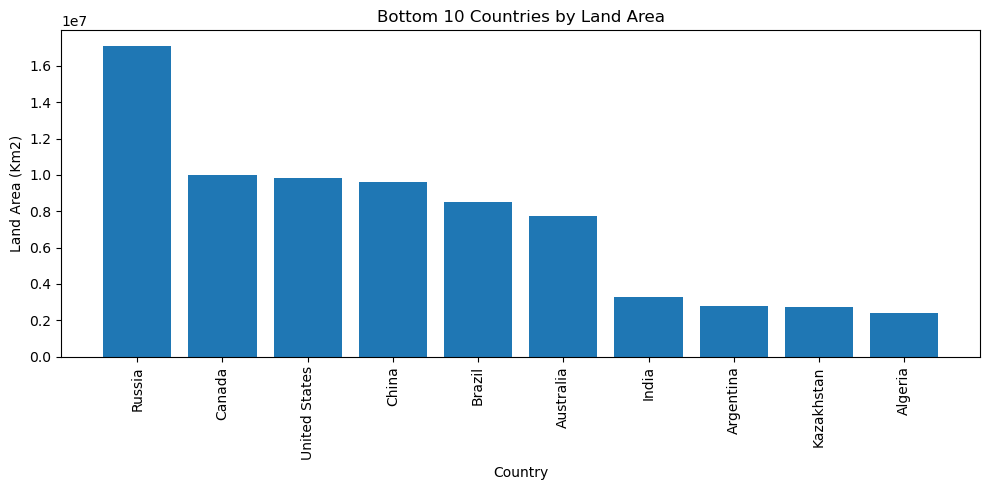

In [9]:
plt.figure(figsize = (10, 5))
top_10_countries1['Land Area(Km2)'] = top_10_countries1['Land Area(Km2)'].astype(int)
plt.bar(top_10_countries1['Country'], top_10_countries1['Land Area(Km2)'])
plt.xlabel('Country')
plt.ylabel('Land Area (Km2)')
plt.title('Bottom 10 Countries by Land Area')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();

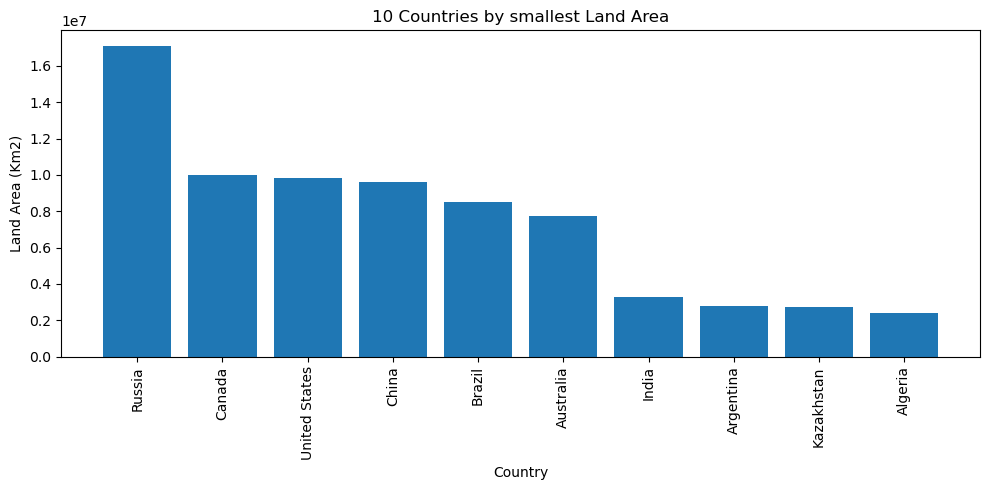

In [10]:
plt.figure(figsize = (10, 5))
top_10_countries1['Land Area(Km2)'] = top_10_countries1['Land Area(Km2)'].astype(int)
plt.bar(top_10_countries1['Country'], top_10_countries1['Land Area(Km2)'])
plt.xlabel('Country')
plt.ylabel('Land Area (Km2)')
plt.title('10 Countries by smallest Land Area')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();

In [11]:
top_10_countries = df.nsmallest(10, 'Land Area(Km2)')
top_10_countries

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Minimum wage in $,Gasoline Price in $
73,Vatican City,2003.0,NaN,NaN,0.0,NaN,NaN,379.0,Vatican City,NaN,NaN,NaN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,Italian,NaN,NaN,836.0,NaN,NaN,NaN,NaN,NaN,41.902916,12.453389,NaN,NaN
113,Monaco,26337.0,MC,NaN,2.0,NaN,5.90,377.0,Monaco City,NaN,NaN,NaN,EUR,NaN,NaN,2.00,7.184844e+09,NaN,NaN,2.6,Monaco City,NaN,NaN,11.72,French,6.1,6.56,38964.0,NaN,NaN,NaN,NaN,38964.0,43.738418,7.424616,11.72,11.72
120,Nauru,541.0,NR,NaN,21.0,NaN,NaN,674.0,Yaren District,NaN,NaN,NaN,AUD,NaN,NaN,NaN,1.330000e+08,NaN,NaN,NaN,NaN,NaN,NaN,nan,English,NaN,NaN,10084.0,NaN,NaN,NaN,NaN,NaN,-0.522778,166.931503,NaN,NaN
181,Tuvalu,393.0,TV,60.0,26.0,NaN,NaN,688.0,Funafuti,11.0,NaN,NaN,AUD,NaN,33.3,NaN,4.727146e+07,86.0,NaN,20.6,Singapore,NaN,NaN,nan,Tuvaluan Language,0.7,0.92,11646.0,NaN,NaN,NaN,NaN,7362.0,-7.109535,177.649330,NaN,NaN
149,San Marino,566.0,SM,16.7,61.0,NaN,6.80,378.0,City of San Marino,NaN,110.63,1.0,EUR,1.26,0.0,NaN,1.637931e+09,108.1,42.5,1.7,City of San Marino,85.4,NaN,nan,Italian,18.3,6.11,33860.0,NaN,18.1,36.2,NaN,32969.0,43.942360,12.457777,NaN,NaN
98,Liechtenstein,238.0,LI,32.2,160.0,NaN,9.90,423.0,Vaduz,51.0,NaN,NaN,CHF,1.44,43.1,1.74,6.552859e+09,104.7,35.6,NaN,Schaan,83.0,NaN,nan,German,NaN,NaN,38019.0,NaN,NaN,21.6,NaN,5464.0,47.141039,9.520935,NaN,NaN
107,Marshall Islands,329.0,MH,63.9,181.0,NaN,29.03,692.0,Majuro,143.0,NaN,NaN,USD,4.05,70.2,1.44,2.212780e+08,84.7,23.7,27.4,Majuro,65.2,NaN,2.00,Marshallese,10.0,0.42,58791.0,NaN,17.8,65.9,NaN,45514.0,7.131474,171.184478,2.00,2.00
145,Saint Kitts and Nevis,205.0,KN,23.1,261.0,NaN,12.60,1.0,Basseterre,238.0,104.57,-1.0,XCD,2.11,42.3,NaN,1.050993e+09,108.7,86.7,9.8,Basseterre,71.3,NaN,3.33,English,56.6,2.52,52823.0,NaN,18.5,49.7,NaN,16269.0,17.357822,-62.782998,3.33,3.33
104,Maldives,1802.0,MV,26.3,298.0,5000.0,14.20,960.0,Mal�,1445.0,99.7,0.2,NaN,1.87,3.3,1.63,5.729248e+09,97.1,31.2,7.4,Mal�,78.6,53.0,nan,Divehi,16.4,4.56,530953.0,69.8,19.5,30.2,6.14,213645.0,3.202778,73.220680,NaN,NaN
106,Malta,1380.0,MT,32.4,316.0,2000.0,9.20,356.0,Valletta,1342.0,113.45,1.6,EUR,1.23,1.1,1.36,1.478616e+10,105.0,54.3,6.1,Birkirkara,82.3,6.0,5.07,Maltese,37.1,2.86,502653.0,56.5,26.2,44.0,3.47,475902.0,35.937496,14.375416,5.07,5.07


/tmp/ipykernel_32/3952484457.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


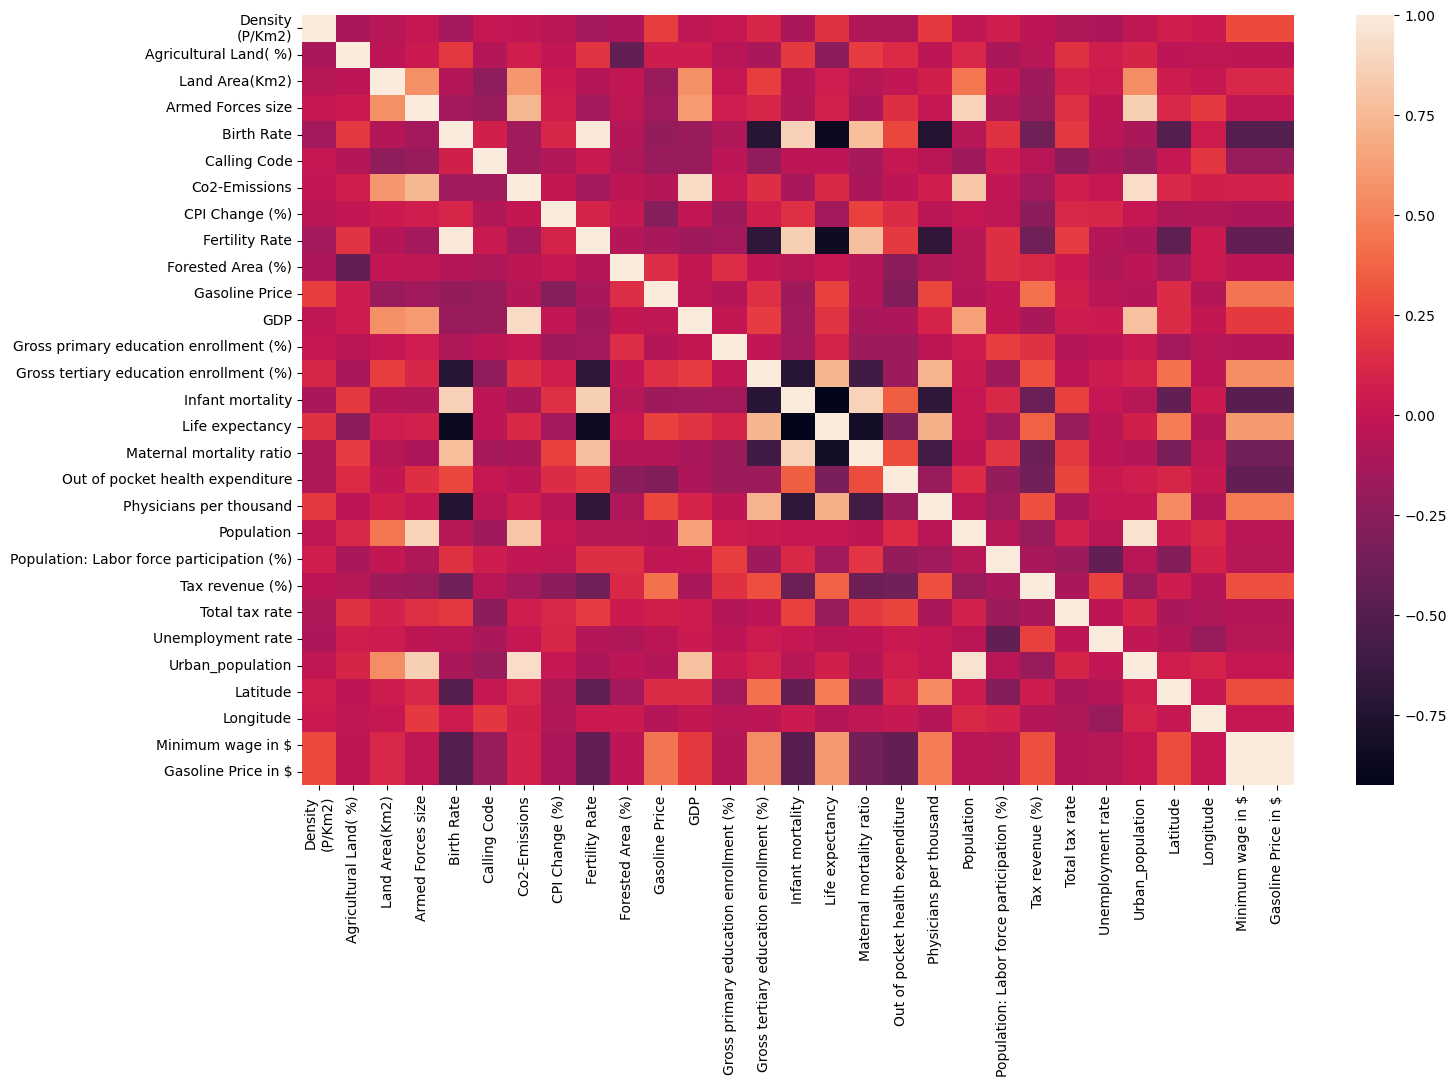

In [12]:
corr = df.corr()
plt.figure(figsize = (16,10))
sns.heatmap(corr);

In [13]:
df.isnull().sum()

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    float64
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    float64
 4   Land Area(Km2)                             194 non-null    float64
 5   Armed Forces size                          171 non-null    float64
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    float64
 10  CPI                       

In [15]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude', 'Minimum wage in $', 'Gasoline Price in $'],
      dtype='object')

In [16]:
df.describe()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Minimum wage in $,Gasoline Price in $
count,195.000000,188.000000,1.940000e+02,1.710000e+02,189.000000,194.000000,1.880000e+02,179.000000,188.000000,188.000000,175.000000,1.930000e+02,188.000000,183.000000,189.000000,187.000000,181.000000,188.000000,188.000000,1.940000e+02,176.000000,169.000000,183.000000,176.000000,1.900000e+02,194.000000,194.000000,150.000000,150.000000
mean,356.764103,39.117553,6.896244e+05,1.592749e+05,20.214974,360.546392,1.777992e+05,6.722346,2.698138,32.015426,1.002457,4.772959e+11,102.470213,37.963388,21.332804,72.279679,160.392265,32.637234,1.839840,3.938116e+07,62.738068,16.573964,40.822404,6.886364,2.230454e+07,19.092351,20.232434,2.194133,2.194133
std,1982.888967,21.783052,1.921609e+06,3.806288e+05,9.945774,323.236419,8.387903e+05,24.450414,1.282267,23.791331,0.368858,2.172173e+12,13.151607,29.261022,19.548058,7.483661,233.502024,19.172697,1.684261,1.450924e+08,10.502907,6.961632,20.557662,5.079216,7.543050e+07,23.961779,66.716110,2.970796,2.970796
min,2.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,-4.300000,0.980000,0.000000,0.000000,4.727146e+07,23.400000,0.800000,1.400000,52.800000,2.000000,0.200000,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03,-40.900557,-175.198242,0.010000,0.010000
25%,35.500000,21.700000,2.382825e+04,1.100000e+04,11.300000,82.500000,2.304250e+03,1.000000,1.705000,11.000000,0.755000,8.454620e+09,98.950000,12.150000,6.000000,67.000000,13.000000,17.450000,0.332500,1.962678e+06,56.150000,11.700000,30.600000,3.395000,1.152961e+06,4.544175,-7.941496,0.402500,0.402500
50%,89.000000,39.600000,1.195110e+05,3.100000e+04,17.950000,255.500000,1.230300e+04,2.300000,2.245000,32.000000,0.980000,3.438723e+10,102.550000,31.200000,14.000000,73.200000,53.000000,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,17.273849,20.972652,1.045000,1.045000
75%,216.500000,55.375000,5.242560e+05,1.420000e+05,28.750000,506.750000,6.388425e+04,4.250000,3.597500,48.175000,1.240000,2.340940e+11,108.025000,63.150000,32.700000,77.500000,186.000000,43.975000,2.935000,2.858549e+07,69.500000,21.100000,48.000000,9.490000,1.490324e+07,40.124603,48.281523,2.447500,2.447500
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,254.900000,6.910000,98.300000,2.000000,2.142770e+13,142.500000,136.600000,84.500000,85.400000,1150.000000,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,64.963051,178.065032,13.590000,13.590000


In [17]:
    Descriptive Statistics:
        What are the summary statistics (mean, median, min, max, etc.) for each numeric column (e.g., Density, Agricultural Land, GDP, Population, etc.)?
        What are the unique values and their frequencies for categorical columns (e.g., Country, Currency-Code, Official language, etc.)?

    Data Distribution:
        How is the distribution of population density across countries?
        Is there a correlation between population density and life expectancy?
        How does agricultural land usage vary among countries?

    Geospatial Analysis:
        Can you create a map to visualize the countries based on their latitude and longitude?
        Are there any interesting geographic patterns or clusters in the data?

    Economic Analysis:
        Is there a correlation between GDP and taxation rates?
        How do gasoline prices vary across different countries?
        What is the relationship between GDP and infant mortality rates?

    Social Indicators:
        How does the literacy rate (if available) relate to the CPI (Corruption Perceptions Index)?
        Is there a correlation between life expectancy and education enrollment rates?

    Healthcare Analysis:
        What is the relationship between healthcare expenditure (out of pocket) and life expectancy?
        How does the number of physicians per thousand people vary across countries?

    Demographics:
        How is the birth rate changing over time?
        What is the fertility rate distribution among countries?
        Are there any significant differences in unemployment rates among countries?

    Language and Culture:
        How many countries share the same official language?
        Is there a correlation between language diversity and GDP?

    Environmental Impact:
        How do CO2 emissions correlate with forested area percentage?
        Is there a relationship between CO2 emissions and population size?

    Labor Force and Employment:
        How does the labor force participation rate relate to the unemployment rate?
        Is there a correlation between the minimum wage and GDP?

    Government and Taxation:
        What is the average tax revenue as a percentage of GDP?
        How does the total tax rate impact economic indicators?

    Urbanization:
        What is the distribution of the urban population among countries?
        Does urbanization correlate with economic development or environmental impact?

    Health and Well-being:
        Is there a correlation between maternal mortality ratio and infant mortality rate?
        How does access to healthcare (physicians per thousand) affect life expectancy?

    Time Series Analysis:
        How have certain indicators (e.g., GDP, CO2 emissions) changed over time for specific countries?
        Are there any trends or patterns in birth rates or life expectancy over the years?

    Comparative Analysis:
        Which countries have the highest and lowest values for specific indicators?
        Can you identify outliers or countries with unique characteristics?

    Correlations and Multivariate Analysis:
        Perform correlation analysis to identify strong relationships between different variables.
        Use regression analysis to understand the factors influencing specific outcomes (e.g., life expectancy).

    Predictive Modeling:
        Can you build predictive models to forecast future values of certain indicators based on historical data?

    Data Visualization:
        Create various plots, charts, and graphs to visualize patterns and relationships in the data.



SyntaxError: invalid syntax (3119998170.py, line 1)